In [159]:
!aws s3 ls

2021-04-22 00:13:19 napoli-polly-350
2021-04-21 14:53:30 napoli-polly-transcribe350
2021-03-31 00:03:07 notebook-deo


In [160]:
!aws s3 ls napoli-polly-350

2021-04-22 15:52:06       2752 english-batter-barter.json
2021-04-22 15:52:08       2369 english-beat-bit.json
2021-04-22 15:52:08        976 english-crazy-glue-sticky.json
2021-04-22 15:52:09       1084 english-croissant.json
2021-04-22 15:52:09        834 english-look-luke.json
2021-04-22 15:52:10        854 english-nearby-target.json
2021-04-22 15:52:10       1308 english-note-not.json
2021-04-22 15:52:10       1066 english-roll-row.json
2021-04-22 15:52:11       1072 english-sheep-ship.json
2021-04-22 15:52:11       1345 english-th-sounds.json
2021-04-22 15:52:06       1323 english-vine-wine.json
2021-04-22 00:20:59       2750 french-batter-barter.json
2021-04-22 00:20:58       2205 french-beat-bit.json
2021-04-22 00:20:59        973 french-crazy-glue-sticky.json
2021-04-22 00:20:55       1078 french-croissant.json
2021-04-22 00:20:55        825 french-look-luke.json
2021-04-22 00:20:56        964 french-nearby-target.json
2021-04-22 00:20:56       1313 french-note-not.json
2021-04

In [161]:
import s3fs
import boto3
import numpy as np
import pandas as pd

In [162]:
df = pd.DataFrame()

In [163]:
s3_resource = boto3.resource('s3') 

In [164]:
my_bucket = s3_resource.Bucket('napoli-polly-350')

In [165]:
summaries = my_bucket.objects.all()

In [166]:
json_names = [json.key for json in summaries]

In [167]:
df['Name'] = json_names

In [168]:
df

,Name
0,english-batter-barter.json
1,english-beat-bit.json
2,english-crazy-glue-sticky.json
3,english-croissant.json
4,english-look-luke.json
5,english-nearby-target.json
6,english-note-not.json
7,english-roll-row.json
8,english-sheep-ship.json
9,english-th-sounds.json


In [169]:
import json

with open('french-beat-bit.json') as f:
  data = json.load(f)

print(data)

{'jobName': 'french-beat-bit', 'accountId': '795731225536', 'results': {'transcripts': [{'transcript': 'The bit is a bit of bedtime stories, enough practice, it will be a bit.'}], 'items': [{'start_time': '0.04', 'end_time': '0.3', 'alternatives': [{'confidence': '0.968', 'content': 'The'}], 'type': 'pronunciation'}, {'start_time': '0.3', 'end_time': '0.59', 'alternatives': [{'confidence': '0.715', 'content': 'bit'}], 'type': 'pronunciation'}, {'start_time': '0.59', 'end_time': '0.78', 'alternatives': [{'confidence': '1.0', 'content': 'is'}], 'type': 'pronunciation'}, {'start_time': '0.78', 'end_time': '0.91', 'alternatives': [{'confidence': '1.0', 'content': 'a'}], 'type': 'pronunciation'}, {'start_time': '0.91', 'end_time': '1.18', 'alternatives': [{'confidence': '1.0', 'content': 'bit'}], 'type': 'pronunciation'}, {'start_time': '1.18', 'end_time': '1.63', 'alternatives': [{'confidence': '1.0', 'content': 'of'}], 'type': 'pronunciation'}, {'start_time': '1.68', 'end_time': '2.25', '

In [170]:
def count_word(file_name):
    with open(file_name) as f:
      data = json.load(f)
    sentence = data['results']['transcripts'][0]['transcript']
    words = sentence.split(" ")
    return len(words)

In [171]:
df['Word Count'] = df['Name'].apply(count_word)

In [172]:
df

,Name,Word Count
0,english-batter-barter.json,20
1,english-beat-bit.json,17
2,english-crazy-glue-sticky.json,6
3,english-croissant.json,7
4,english-look-luke.json,5
5,english-nearby-target.json,5
6,english-note-not.json,9
7,english-roll-row.json,7
8,english-sheep-ship.json,7
9,english-th-sounds.json,9


In [173]:
def accuracy(file_name):
    with open(file_name) as f:
      data = json.load(f)
    confidence = []
    content = []
    acc = 0

    for i in data['results']['items']:
        for words in i['alternatives']:
            if words['confidence'] != '0.0':
                confidence.append(words['confidence'])
                content.append(words['content'])
    
    
    for values in confidence:
        if float(values) >= 0.9:
            acc += 1
    
    return acc/len(confidence)

In [174]:
df['Accuracy'] = df['Name'].apply(accuracy)

In [175]:
df

,Name,Word Count,Accuracy
0,english-batter-barter.json,20,1.000000
1,english-beat-bit.json,17,1.000000
2,english-crazy-glue-sticky.json,6,0.833333
3,english-croissant.json,7,0.714286
4,english-look-luke.json,5,0.800000
5,english-nearby-target.json,5,0.800000
6,english-note-not.json,9,1.000000
7,english-roll-row.json,7,1.000000
8,english-sheep-ship.json,7,1.000000
9,english-th-sounds.json,9,1.000000


In [176]:
count_word("french-beat-bit.json")

15

In [177]:
accuracy("french-beat-bit.json")

0.8

# Accuracy Column for Word Consistency

We look to add a column to our DataFrame to show how the total word count was affected by the AWS Transcribe service with different input Polly accents. As a reminder, these are the word counts for each of the 11 sentence inputs, indicated in parentheses. The sentences listed are alphabetically ordered by the hyomnyms used in our project.

`Batter/barter`: The batter is ready to swing on the next pitch, do not barter with the lady in front of Target. (20) 

`Beat/bit`: The beat is a bit off, but I’m sure with enough practice it will be on beat. (17)

`Crazy-glue-sticky`: The crazy glue is extremely sticky. (6)

`Croissant`: Alexa, where did I leave my croissant? (7)

`Look/Luke`: Look at the clouds, Luke. (5)

`Not/note`: I am leaving you a note do not forget. (9)

`Roll/row`: The roll is in the last row. (7)

`th-sounds`: The thought of that instance occurring throttles my brain. (9)

`Vine/wine`: The grapes from the vine will turn into wine. (9)

`Sheep/ship`: There is a sheep on the ship. (7)


We see from the 'dif_word_count' column that the rankings for the transcription for the four different Polly accents in terms of having the same word count as our original input sentences are:

1. English Polly with 10 sentences with the same word count as original input sentences
2. Hindi Polly with 9 sentences with the same word count as original input sentences
3. Spanish Polly with 7 sentences with the same word count as original input sentences
4. French Polly with 6 sentences with the same word count as original input sentences

As expected, we understand that our sentence is using words from the Enlgish language, so we would expect the English Polly accent to come up first in these rankings. Then it is of interest to see why Hindi comes up higher in these rankings than Spanish & French, as English is the most commonly spoken foreign language in all of these countries.


In [178]:
act_count = [20, 17, 6, 7, 5, 6, 9, 7, 7, 9, 9, 20, 17, 6, 7, 5, 6, 9, 7, 7, 9, 9, 20, 17, 6, 7, 5, 6, 9, 7, 7, 9, 9, 20, 17, 6, 7, 5, 6, 9, 7, 7, 9, 9]
print(len(act_count), len(df))
df['act_word_count'] = act_count
df['dif_word_count'] = df['act_word_count'] - df['Word Count']
df

44 44


,Name,Word Count,Accuracy,act_word_count,dif_word_count
0,english-batter-barter.json,20,1.000000,20,0
1,english-beat-bit.json,17,1.000000,17,0
2,english-crazy-glue-sticky.json,6,0.833333,6,0
3,english-croissant.json,7,0.714286,7,0
4,english-look-luke.json,5,0.800000,5,0
5,english-nearby-target.json,5,0.800000,6,1
6,english-note-not.json,9,1.000000,9,0
7,english-roll-row.json,7,1.000000,7,0
8,english-sheep-ship.json,7,1.000000,7,0
9,english-th-sounds.json,9,1.000000,9,0


In [179]:
language = []
for row in df['Name']:
    sections = row.split("-")
    language.append(sections[0])
   

df['language'] = language
print(df.head())

                             Name  Word Count  Accuracy  act_word_count  \
0      english-batter-barter.json          20  1.000000              20   
1           english-beat-bit.json          17  1.000000              17   
2  english-crazy-glue-sticky.json           6  0.833333               6   
3          english-croissant.json           7  0.714286               7   
4          english-look-luke.json           5  0.800000               5   

   dif_word_count language  
0               0  english  
1               0  english  
2               0  english  
3               0  english  
4               0  english  


In [180]:
import matplotlib.pyplot as plt 
languages_score = df.groupby("language")['Accuracy'].mean()
languages_score = languages_score.reset_index()
print(languages_score)

  language  Accuracy
0  english  0.922511
1   french  0.762266
2    hindi  0.942316
3  spanish  0.826022


Text(0.5, 1.0, 'Bar Graph Comparing Average Word Confidence Levels of AWS Transcribe Language Transcriptions with Polly Accents')

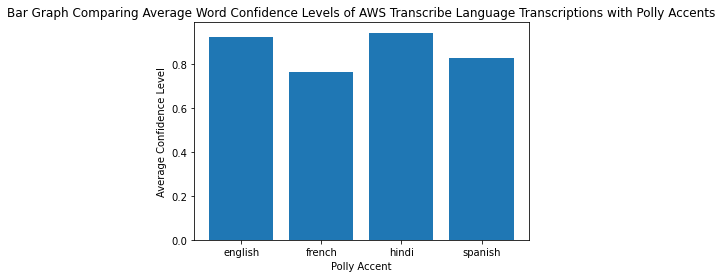

In [229]:
plt.bar(languages_score['language'], languages_score['Accuracy'])
plt.xlabel('Polly Accent')
plt.ylabel('Average Confidence Level')
plt.title("Bar Graph Comparing Average Word Confidence Levels of AWS Transcribe Language Transcriptions with Polly Accents")

In [182]:
import matplotlib
import matplotlib.pyplot as plt

In [183]:
polly = pd.read_csv('polly.csv')

In [184]:
polly

,Language,batter-Barter,beat-bit,crazy-glue-sticky,croissant,look-luke,nearby-target,note-not,role-row,sheep-ship,th-sounds,vine-wine
0,English,1.00,1.00,0.83,0.710,0.8,0.8,1.00,1.00,1.000,1.00,1.0
1,French,0.85,0.80,0.67,0.860,0.8,1.0,0.78,0.50,0.750,0.58,0.8
2,Hindi,1.00,1.00,0.83,0.875,0.8,1.0,1.00,0.85,1.000,1.00,1.0
3,Spanish,0.74,0.69,0.83,0.860,0.8,1.0,1.00,0.71,0.857,0.80,0.8


Text(0.5, 1.0, 'Stacked Bar Chart of AWS Transcribe Language Transcriptions with Polly Accents')

<Figure size 640x480 with 0 Axes>

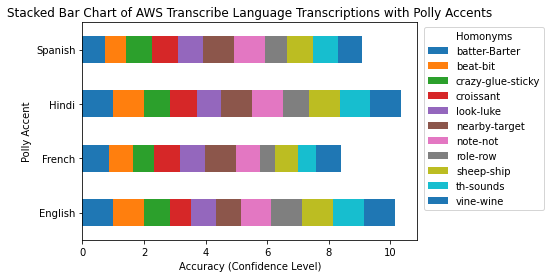

In [227]:
from matplotlib.pyplot import figure
figure(figsize=(8,6), dpi=80)
polly.plot(kind='barh', stacked=True)
plt.yticks([3,2,1,0],['Spanish','Hindi','French','English'])
plt.legend(loc="upper center", bbox_to_anchor=(1.2,1), title = 'Homonyms')
plt.xlabel('Accuracy (Confidence Level)')
plt.ylabel('Polly Accent')
plt.title("Stacked Bar Chart of AWS Transcribe Language Transcriptions with Polly Accents")

# Analysis

We see here from the stacked bar chart that Hindi has the most cumulative accuracy, implying that Polly's Hindi accent was transcribed with the most accuracy overall. Followed up with this was Polly's English accent, then Spanish, and lastly French. 

# Overall Word Accuracy

Now that we've analyzed the accuracy with the confidence score of AWS Transcribe, we also want to analyze how sentence word length affects the AWS Trancribe accuracy for different Polly accents.

In [186]:
pollytranscribe = pd.read_csv('pollytranscribe.csv')

In [187]:
pollytranscribe

,Sentence Length,English,French,Hindi,Spanish
0,5,0.80,0.800,0.800,0.800
1,6,0.83,0.670,0.830,0.830
2,6,0.80,1.000,1.000,1.000
3,7,0.71,0.857,0.875,0.857
4,7,1.00,0.500,0.857,0.714
5,7,1.00,0.750,1.000,0.857
6,9,1.00,0.780,1.000,1.000
7,9,1.00,0.580,1.000,0.800
8,9,1.00,0.800,1.000,0.800
9,17,1.00,0.800,1.000,0.690


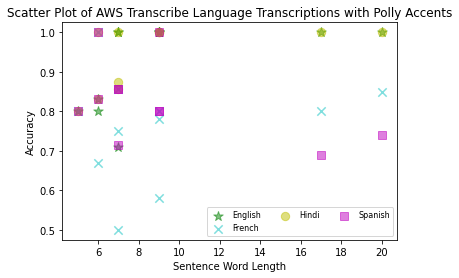

In [223]:
sentence_length = pollytranscribe['Sentence Length']
language_english = pollytranscribe['English']
language_french = pollytranscribe['French']
language_hindi = pollytranscribe['Hindi']
language_spanish = pollytranscribe['Spanish']

eng = plt.scatter(sentence_length, language_english, color='g', marker='*', alpha=0.5, s=100)
fr = plt.scatter(sentence_length, language_french, color='c', marker='x', alpha=0.5, s=70)
hnd = plt.scatter(sentence_length, language_hindi, color='y', marker='o', alpha=0.5, s=70)
sp = plt.scatter(sentence_length, language_spanish, color='m', marker='s', alpha=0.5, s=70)

plt.xlabel('Sentence Word Length')
plt.ylabel('Accuracy')
plt.title("Scatter Plot of AWS Transcribe Language Transcriptions with Polly Accents")

plt.legend((eng, fr, hnd, sp),
           ('English', 'French', 'Hindi', 'Spanish'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)


plt.show()


In [189]:
from scipy.stats import linregress
res_english = linregress(sentence_length, language_english)
res_english._asdict()

OrderedDict([('slope', 0.011836492890995259),
             ('intercept', 0.8120616113744077),
             ('rvalue', 0.5063852028317026),
             ('pvalue', 0.11195609873669005),
             ('stderr', 0.006718663431319939)])

In [190]:
res_french = linregress(sentence_length, language_french)
res_french._asdict()

OrderedDict([('slope', 0.004512243285939967),
             ('intercept', 0.7206137440758293),
             ('rvalue', 0.15770240808810718),
             ('pvalue', 0.6432921040380943),
             ('stderr', 0.009418119043532836)])

In [191]:
res_hindi = linregress(sentence_length, language_hindi)
res_hindi._asdict()

OrderedDict([('slope', 0.00877567140600316),
             ('intercept', 0.8606255924170616),
             ('rvalue', 0.5106898501020933),
             ('pvalue', 0.10843948510274522),
             ('stderr', 0.004924721097692396)])

In [192]:
res_spanish = linregress(sentence_length, language_spanish)
res_spanish._asdict()

OrderedDict([('slope', -0.010272511848341236),
             ('intercept', 0.9214360189573461),
             ('rvalue', -0.48572595810540353),
             ('pvalue', 0.1298554827245016),
             ('stderr', 0.006162128351607812)])

In [193]:
fx1 = np.array([sentence_length.min(), sentence_length.max()])
fy1 = res_english.intercept + res_english.slope * fx1

In [194]:
fx2 = np.array([sentence_length.min(), sentence_length.max()])
fy2 = res_french.intercept + res_french.slope * fx2

In [195]:
fx3 = np.array([sentence_length.min(), sentence_length.max()])
fy3 = res_hindi.intercept + res_hindi.slope * fx3

In [196]:
fx4 = np.array([sentence_length.min(), sentence_length.max()])
fy4 = res_spanish.intercept + res_spanish.slope * fx4

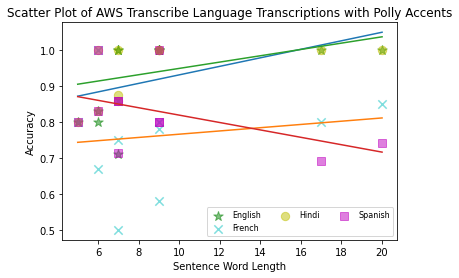

In [224]:

eng = plt.scatter(sentence_length, language_english, color='g', marker='*', alpha=0.5, s=100)
fr = plt.scatter(sentence_length, language_french, color='c', marker='x', alpha=0.5, s=70)
hnd = plt.scatter(sentence_length, language_hindi, color='y', marker='o', alpha=0.5, s=70)
sp = plt.scatter(sentence_length, language_spanish, color='m', marker='s', alpha=0.5, s=70)

plt.xlabel('Sentence Word Length')
plt.ylabel('Accuracy')
plt.title("Scatter Plot of AWS Transcribe Language Transcriptions with Polly Accents")

plt.legend((eng, fr, hnd, sp),
           ('English', 'French', 'Hindi', 'Spanish'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)

plt.plot(fx1, fy1, '-')
plt.plot(fx2, fy2, '-')
plt.plot(fx3, fy3, '-')
plt.plot(fx4, fy4, '-')


plt.show()

# Anlaysis of Scatter Plot

We see from the scatter plot that for the most part, it does seem that on average as the words in a sentence increase, there is a higher accuracy with which AWS Transcribe will transcirbe a text with a given AWS Polly speech accent sample. However, this is only the case with the Polly accents of English, French, and Spanish, as we see a regression line with a negatvie slope for the line of best fit for the Hindi transcription accuracy data.